# **ETC**

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
!pip install arch
import arch
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 14.9 MB/s eta 0:00:00


In [ ]:
!pip install -Iv rpy2==3.4.2

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.1/186.1 kB 4.8 MB/s eta 0:00:00
  Running command python setup.py egg_info
  /usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!

          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************

  !!
    dist.fetch_build_eggs(dist.setup_requires)
  ['cffi>=1.10.0', 'jinja2', 'pytz', 'tzlocal']
  running egg_info
  creating /tmp/pip-pip-egg-info-c6ns5707/rpy2.egg-info
  writing /tmp/pip-pip-egg-info-c6ns5707/rpy2

In [ ]:
from google.colab import drive
# Please mount your drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. A GARCH Model of Oil Prices**

In [ ]:
weekly_oil = pd.read_excel('/content/drive/MyDrive/GARCH/TAF_3_Modelling_Volatility_PES_oil.xls',index_col=0)
weekly_oil.index = pd.to_datetime(weekly_oil.index)
weekly_oil.index.freq = 'W-FRI'


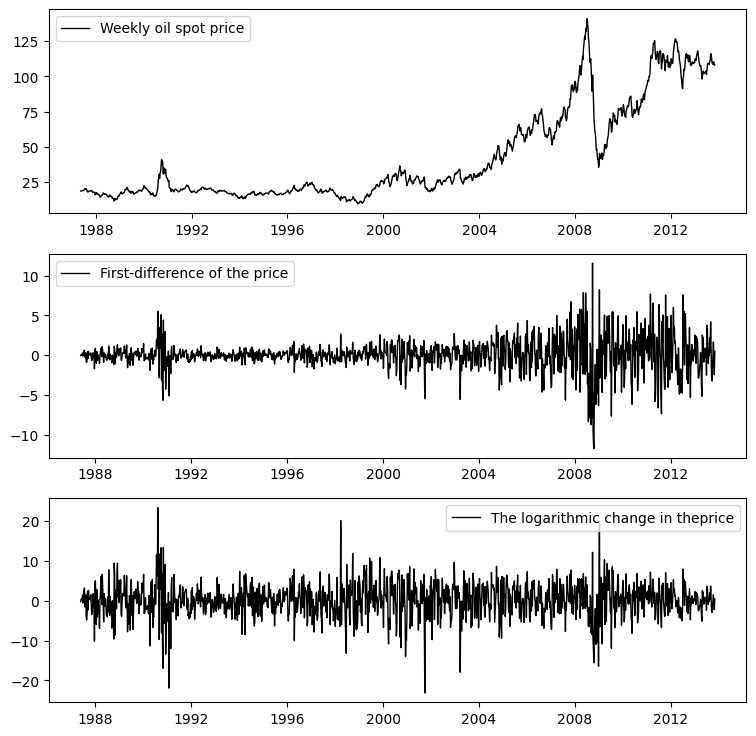

In [ ]:
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 3*3))
axes[0].plot(weekly_oil,color='black',linewidth=1,label='Weekly oil spot price')
axes[0].legend()
axes[1].plot(weekly_oil.diff(),color='black',linewidth=1,label='First-difference of the price')
axes[1].legend()
axes[2].plot(np.log(weekly_oil/weekly_oil.shift(1))*100,color='black',linewidth=1,label='The logarithmic change in theprice')
axes[2].legend()
plt.show()

In [ ]:
def adf_test(dataframe):
  result = adfuller(dataframe)
  print(f'Statistics: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'Critical values: {result[4]}')

adf_test(weekly_oil)
print('---'*40)
adf_test(weekly_oil.diff().dropna())
print('---'*40)
adf_test(np.log(weekly_oil/weekly_oil.shift(1)).dropna()*100)

Statistics: -1.1354866114313105
p-value: 0.7007148498766306
Critical values: {'1%': -3.4351321860409674, '5%': -2.863651979448174, '10%': -2.567894416324791}
------------------------------------------------------------------------------------------------------------------------
Statistics: -9.970477287647228
p-value: 2.2473735436231965e-17
Critical values: {'1%': -3.4351321860409674, '5%': -2.863651979448174, '10%': -2.567894416324791}
------------------------------------------------------------------------------------------------------------------------
Statistics: -17.180926385469377
p-value: 6.647698576457701e-30
Critical values: {'1%': -3.4351078301822016, '5%': -2.8636412316027577, '10%': -2.5678886927682663}


In [ ]:
def kpss_test(dataframe):
  result = kpss(dataframe)
  print(f'Statistics: {result[0]}')
  print(f'bounded p-value: {result[1]}')
  print(f'Critical values: {result[3]}')

kpss_test(weekly_oil)
print('---'*40)
kpss_test(weekly_oil.diff().dropna())
print('---'*40)
kpss_test(np.log(weekly_oil/weekly_oil.shift(1)).dropna()*100)

Statistics: 4.850221989568524
bounded p-value: 0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
------------------------------------------------------------------------------------------------------------------------
Statistics: 0.08440189249882568
bounded p-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
------------------------------------------------------------------------------------------------------------------------
Statistics: 0.07035420343048165
bounded p-value: 0.1
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


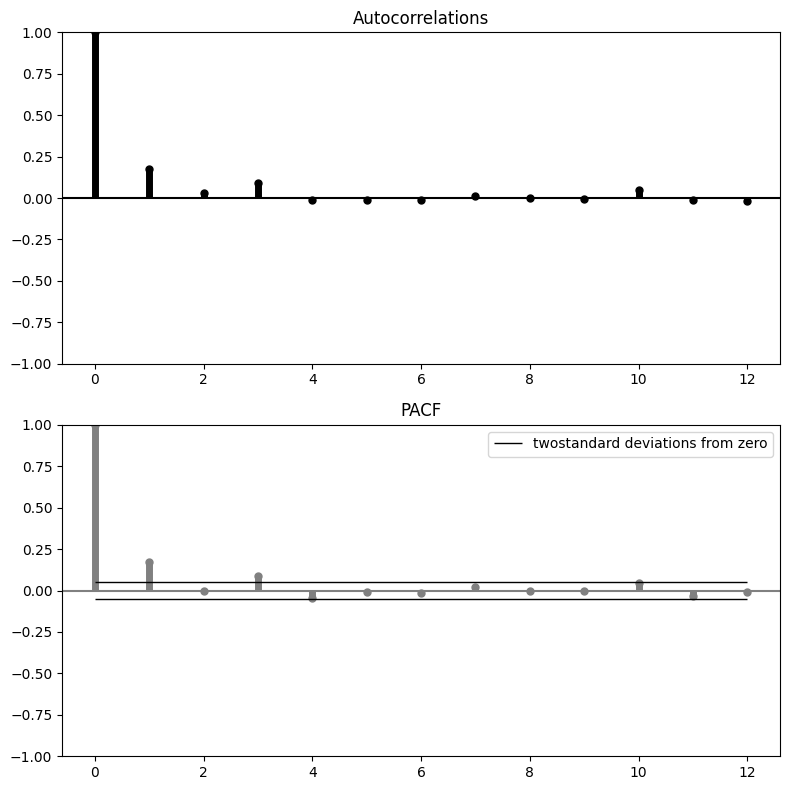

In [ ]:
log_change = np.log(weekly_oil/weekly_oil.shift(1)).dropna()*100
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2*4))
plot_acf(log_change, lags=12, ax=axes[0], title='Autocorrelations',color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
plot_pacf(log_change, lags=12, ax=axes[1], method='ols', title='PACF',color='gray',vlines_kwargs={'colors':'gray','linewidth':5}, alpha=None)
axes[1].hlines(xmin=0,xmax=12,y=2*np.sqrt(1/len(log_change)),label='twostandard deviations from zero',color='black',linewidth=1)
axes[1].hlines(xmin=0,xmax=12,y=-2*np.sqrt(1/len(log_change)),color='black',linewidth=1)
axes[1].legend()
plt.tight_layout()
plt.show()

#한번 미분이랑 계절성 지운거 둘다 정상성 만족하는데 계절성 지운거 선택한 이유는 미분을 안하는게 정보의 손실이 없어서 더 좋다

In [ ]:
res_1 = ARIMA(endog = log_change, order=(0,0,[1,3]), trend='c').fit(method='innovations_mle')
print('MA([1,3])')
for param_name, param in zip(res_1.params.index, res_1.params):
  coef = round(param,2)
  t_stats = round(res_1.tvalues[param_name],2)
  print(f'[{param_name}] = coef:{coef}, t_stats:{t_stats}')

residuals = res_1.resid
acf_d = acf(residuals, nlags=8)[1:]
print('ACF of the residuals')
print(acf_d)
squared_resids = residuals**2
acf_d_2 = acf(squared_resids, nlags=8)[1:]
print('ACF of the squared residuals')
print(acf_d_2)

#상수항은 설명력이 없음. 이동평균 1과 3은 설명력을 가짐, 잔차분산이 매우 큼으로 잔차끼리 상관이 존재하여 GARCH모델을 써야 함.

MA([1,3])
[const] = coef:0.13, t_stats:0.9
[ma.L1] = coef:0.18, t_stats:9.31
[ma.L3] = coef:0.09, t_stats:4.6
[sigma2] = coef:16.98, t_stats:41.3
ACF of the residuals
[ 0.0018987   0.01249434 -0.00166612 -0.00924516 -0.0133628  -0.00787883
  0.01006452  0.00517871]
ACF of the squared residuals
[0.18257964 0.16854587 0.1422242  0.15950048 0.12322461 0.14544861
 0.1795277  0.1480055 ]


In [ ]:
print('the MecLeod-Li test')
print(sm.stats.acorr_ljungbox(squared_resids, lags=[1,2,3,4,5,6,7,8]))
res_2 = ARIMA(endog = squared_resids, order=(4,0,0), trend='c').fit(method='innovations_mle')
hypotheses = '(ar.L1 = 0), (ar.L2 = 0), (ar.L3 = 0), (ar.L4 = 0)'
# This tests that each coefficient is jointly statistically significantlydifferent from zero.
print(res_2.f_test(hypotheses))

for param_name, param in zip(res_2.params.index, res_2.params):
  coef = round(param,2)
  t_stats = round(res_2.tvalues[param_name],2)
  print(f'[{param_name}] = coef:{coef}, t_stats:{t_stats}')

#Q test의 귀무가설이 기각되어버림.

the MecLeod-Li test
      lb_stat     lb_pvalue
1   46.136160  1.103135e-11
2   85.481006  2.741798e-19
3  113.516851  1.920329e-24
4  148.803133  3.674435e-31
5  169.879334  7.741901e-35
6  199.264782  2.720764e-40
7  244.066232  5.072521e-49
8  274.538239  1.068739e-54
<F test: F=75.96666989306557, p=nan, df_denom=inf, df_num=4>
[const] = coef:16.94, t_stats:4.99
[ar.L1] = coef:0.13, t_stats:8.05
[ar.L2] = coef:0.11, t_stats:8.0
[ar.L3] = coef:0.08, t_stats:5.03
[ar.L4] = coef:0.11, t_stats:6.63
[sigma2] = coef:1343.81, t_stats:83.25


In [ ]:
# Fitting GARCH(1,1) model
res_3 = ARIMA(endog = log_change, order=(0,0,1), trend='c').fit(method='innovations_mle')
print('A MA(1) conditional mean model')

for param_name, param in zip(res_3.params.index, res_3.params):
  coef = round(param,2)
  t_stats = round(res_3.tvalues[param_name],2)
  print(f'[{param_name}] = coef:{coef}, t_stats:{t_stats}')

model = arch.arch_model(res_3.resid,
vol = 'GARCH', p = 1,q = 1)
garch_results = model.fit(disp = 'off', show_warning = False)
print(garch_results.summary())

A MA(1) conditional mean model
[const] = coef:0.13, t_stats:0.97
[ma.L1] = coef:0.18, t_stats:9.6
[sigma2] = coef:17.14, t_stats:41.61
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3796.10
Distribution:                  Normal   AIC:                           7600.19
Method:            Maximum Likelihood   BIC:                           7621.12
                                        No. Observations:                 1381
Date:                Mon, Jun 26 2023   Df Residuals:                     1380
Time:                        03:36:43   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
--------

In [ ]:
# ACF of the standardized residuals and standardlized squared residuals
garch11_std_resid = garch_results.std_resid
acf_d = acf(garch11_std_resid, nlags=8)[1:]
print('ACF of the std residuals')
print(acf_d)
acf_d = acf(garch11_std_resid**2, nlags=8)[1:]
print('ACF of the squared std residuals')
print(acf_d)
print(sm.stats.acorr_ljungbox(garch11_std_resid, lags=[4,8]))
print(sm.stats.acorr_ljungbox(garch11_std_resid**2, lags=[4,8]))


ACF of the std residuals
[ 0.05529491 -0.00389773  0.04059871 -0.01441606 -0.03350124 -0.02191025
 -0.00327688 -0.01314317]
ACF of the squared std residuals
[-0.00030731  0.00511315 -0.00211738 -0.00583716 -0.02512703 -0.01331425
 -0.01228585  0.00200178]
    lb_stat  lb_pvalue
4  6.825419   0.145407
8  9.305286   0.317201
    lb_stat  lb_pvalue
4  0.089814   0.999021
8  1.427791   0.993843


In [ ]:
res_ar4 = ARIMA(endog = garch11_std_resid, order=(4,0,0), trend='c').fit(method='innovations_mle')
res_ar4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              std_resid   No. Observations:                 1381
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -1953.910
Date:                Mon, 26 Jun 2023   AIC                           3919.819
Time:                        03:36:43   BIC                           3951.202
Sample:                    05-22-1987   HQIC                          3931.559
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.029     -0.162      0.872      -0.062       0.053
ar.L1          0.0567      0.027      2.107      0.035       0.004       0.109
ar.L2         -0.0095      0.027     -0.346      0.729      -0.063       0.044
ar.L3          0.0423      0.028      1.528      0.126      -0.012       0.097
ar.L4         -0.0191      0.027     -0.694      0.488      -0.073       0.035
sigma2         0.9919      0.028     35.426      0.000       0.937       1.047
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               200.49
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.21
Prob(H) (two-sided):                  0.76   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
hypotheses = '(ar.L1 = 0), (ar.L2 = 0), (ar.L3 = 0), (ar.L4 = 0)'
# This tests that each coefficient is jointly statistically significantlydifferent from zero.
print(res_ar4.f_test(hypotheses))


<F test: F=1.8686529283892594, p=nan, df_denom=inf, df_num=4>


# **2. A GARCH Model of the Spread**

In [ ]:
quarterly = pd.read_excel('/content/drive/MyDrive/GARCH/TAF_2_Stationary_Time_Series_PES_quarterly.xls',index_col=0)
usbond, tbill = quarterly['r5'], quarterly['Tbill']
spread = usbond - tbill
spread.index = pd.to_datetime(spread.index)
spread.index.freq = 'QS-OCT'


<Axes: xlabel='DATE'>

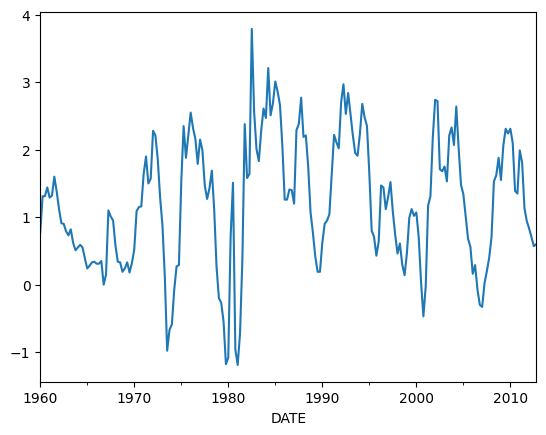

In [ ]:
spread.plot()

In [ ]:
model = ARIMA(endog = spread, order=(2,0,[1,7]), trend='c').fit(method='innovations_mle') # ARMA[2,(1,7)]
for param_name, param in zip(model.params.index, model.params):
  coef = round(param,2)
  t_stats = round(model.tvalues[param_name],2)
  print(f'[{param_name}] = coef:{coef}, t_stats:{t_stats}')

[const] = coef:1.19, t_stats:5.74
[ar.L1] = coef:0.34, t_stats:3.24
[ar.L2] = coef:0.4, t_stats:4.18
[ma.L1] = coef:0.78, t_stats:10.93
[ma.L7] = coef:-0.14, t_stats:-3.73
[sigma2] = coef:0.21, t_stats:15.1


# **3. Formal Tests for ARCH Errors**

In [ ]:
arma_2_17_resid = model.resid
acf_d = acf(arma_2_17_resid**2, nlags=8)[1:]
print('ACF of the squared residuals')
print(acf_d)
print(sm.stats.acorr_ljungbox(arma_2_17_resid**2, lags=[4,8]))


ACF of the squared residuals
[0.04102062 0.17552853 0.1817144  0.31826154 0.0660248  0.02399291
 0.37925097 0.12862706]
     lb_stat     lb_pvalue
4  36.278727  2.535725e-07
8  72.871304  1.314763e-12


In [ ]:
print('the McLeod-Li test')
res = ARIMA(endog = arma_2_17_resid**2, order=(7,0,0), trend='c').fit(method='innovations_mle')
hypotheses = '(ar.L1 = 0), (ar.L2 = 0), (ar.L3 = 0), (ar.L4 = 0), (ar.L5 = 0),(ar.L6 = 0), (ar.L7 = 0)'
# This tests that each coefficient is jointly statistically significantlydifferent from zero.
print(res.f_test(hypotheses))
for param_name, param in zip(res.params.index, res.params):
  coef = round(param,2)
  t_stats = round(res.tvalues[param_name],2)
  print(f'[{param_name}] = coef:{coef}, t_stats:{t_stats}')

the McLeod-Li test
<F test: F=16.282200622368, p=nan, df_denom=inf, df_num=7>
[const] = coef:0.2, t_stats:1.1
[ar.L1] = coef:-0.02, t_stats:-0.15
[ar.L2] = coef:0.14, t_stats:4.52
[ar.L3] = coef:0.09, t_stats:0.89
[ar.L4] = coef:0.25, t_stats:4.62
[ar.L5] = coef:-0.03, t_stats:-0.22
[ar.L6] = coef:-0.09, t_stats:-0.72
[ar.L7] = coef:0.3, t_stats:4.08
[sigma2] = coef:0.19, t_stats:31.49


# **4. Alternative Estimates of the Model**

In [ ]:
# The installation takes about eight to ten minutes.
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
robjects.r("install.packages(\"gdata\") ")
robjects.r("install.packages(\"rugarch\") ")
robjects.r('library("gdata")')
robjects.r('library("rugarch")')
robjects.r("library('zoo')")
robjects.r("install.packages('zoo')")
robjects.r("install.packages(\"readxl\")")
robjects.r('library("readxl")')

# Convert pandas.DataFrames to R dataframes automatically.
pandas2ri.activate()


(as ‘lib’ is unspecified)














	‘/tmp/RtmpC3oWWH/downloaded_packages’

(as ‘lib’ is unspecified)


















































































































	‘/tmp/RtmpC3oWWH/downloaded_packages’

Attaching package: ‘gdata’



    nobs



    object.size



    startsWith



Attaching package: ‘rugarch’



    sigma


Attaching package: ‘zoo’



    as.Date, as.Date.numeric


(as ‘lib’ is unspecified)







	‘/tmp/RtmpC3oWWH/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpC3oWWH/downloaded_packages’



In [ ]:
robjects.r('data = read.xls("/content/drive/MyDrive/GARCH/TAF_2_Stationary_Time_Series_PES_quarterly.xls\")')

robjects.r('data$DATE = as.yearqtr(data$DATE)')
spread = robjects.r('data$spread = data$r5-data$Tbill')
index = robjects.r('data$DATE')

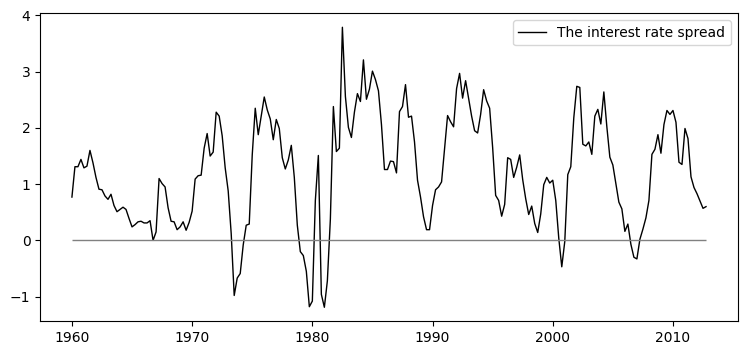

In [ ]:
spread = pd.Series(spread,index=index)
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
axes.plot(spread,color='black',linewidth=1,label='The interest rate spread')
axes.hlines(xmin=spread.index[0],xmax=spread.index[-1],y=0,color='gray',linewidth=1)
axes.legend()


In [ ]:
robjects.r('spec.arma27garch11 = ugarchspec(mean.model=list(armaOrder=c(2,7)),variance.model=list(garchOrder=c(1,1),model="sGARCH"),fixed.pars=list(ma2=0,ma3=0,ma4=0,ma5=0,ma6=0))')
fit_arma27garch11 = robjects.r('fit.arma27garch11 = ugarchfit(spec.arma27garch11,data=data$spread,solver="gosolnp")')
print(fit_arma27garch11)
# Omega means the constant. Alpha means the MA term. Beta means the AR term.


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(2,0,7)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      1.035153    0.169921   6.0920 0.000000
ar1     0.463522    0.138332   3.3508 0.000806
ar2     0.343381    0.128526   2.6717 0.007547
ma1     0.718349    0.096102   7.4749 0.000000
ma2     0.000000          NA       NA       NA
ma3     0.000000          NA       NA       NA
ma4     0.000000          NA       NA       NA
ma5     0.000000          NA       NA       NA
ma6     0.000000          NA       NA       NA
ma7    -0.122107    0.042346  -2.8836 0.003932
omega   0.010607    0.006709   1.5810 0.113870
alpha1  0.194465    0.059822   3.2507 0.001151
beta1   0.770166    0.057529  13.3873 0.000000

Robust Standard Errors:
        

In [ ]:
std_resid = robjects.r("fit.arma27garch11@fit$z")

In [ ]:
acf_d = acf(std_resid, nlags=8)[1:]
print('ACF of the std residuals')
print(acf_d)
print(sm.stats.acorr_ljungbox(std_resid, lags=[4,8]))
print('ACF of the squared std residuals')
acf_d = acf(np.array(std_resid)**2, nlags=8)[1:]
print(acf_d)
print(sm.stats.acorr_ljungbox(std_resid**2, lags=[4,8]))


ACF of the std residuals
[ 0.06227296  0.01355227  0.01144848  0.07290825 -0.06351646 -0.13590606
 -0.01575405  0.05592273]
    lb_stat  lb_pvalue
4  2.061355   0.724475
8  7.763786   0.456878
ACF of the squared std residuals
[-0.11726565  0.18721775  0.00259145  0.05877361  0.00530717 -0.0487755
  0.14482816 -0.03857237]
     lb_stat  lb_pvalue
4  11.283853   0.023552
8  16.786817   0.032407


In [ ]:
print('the MecLeod-Li test')
res = ARIMA(endog = pd.Series(std_resid**2), order=(2,0,0), trend='c').fit(method='innovations_mle')
hypotheses = '(ar.L1 = 0), (ar.L2 = 0)'
# This tests that each coefficient is jointly statistically significantlydifferent from zero.
print(res.f_test(hypotheses))
for param_name, param in zip(res.params.index, res.params):
  coef = round(param,2)
  t_stats = round(res.tvalues[param_name],2)
  print(f'[{param_name}] = coef:{coef}, t_stats:{t_stats}')


the MecLeod-Li test
<F test: F=13.706523045304674, p=nan, df_denom=inf, df_num=2>
[const] = coef:0.95, t_stats:4.8
[ar.L1] = coef:-0.1, t_stats:-0.69
[ar.L2] = coef:0.17, t_stats:5.18
[sigma2] = coef:2.57, t_stats:14.38


In [ ]:
 robjects.r('spec.arma27garch12 = ugarchspec(mean.model=list(armaOrder=c(2,7)),variance.model=list(garchOrder=c(1,2),model="sGARCH"),fixed.pars=list(ma2=0,ma3=0,ma4=0,ma5=0,ma6=0))')
fit_arma27garch12 = robjects.r('fit.arma27garch12 = ugarchfit(spec.arma27garch12,data=data$spread,solver="gosolnp")')
print(fit_arma27garch12)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,2)
Mean Model	: ARFIMA(2,0,7)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      1.035142    0.169988   6.0895 0.000000
ar1     0.463505    0.138357   3.3501 0.000808
ar2     0.343396    0.128536   2.6716 0.007549
ma1     0.718362    0.096198   7.4676 0.000000
ma2     0.000000          NA       NA       NA
ma3     0.000000          NA       NA       NA
ma4     0.000000          NA       NA       NA
ma5     0.000000          NA       NA       NA
ma6     0.000000          NA       NA       NA
ma7    -0.122105    0.042566  -2.8686 0.004123
omega   0.010607    0.007000   1.5153 0.129704
alpha1  0.194471    0.071734   2.7110 0.006708
beta1   0.770158    0.343577   2.2416 0.024988
beta2   0.000000    0.296104   0.

In [ ]:
robjects.r('spec.arma27garch21 = ugarchspec(mean.model=list(armaOrder=c(2,7)),variance.model=list(garchOrder=c(2,1),model="sGARCH"),fixed.pars=list(ma2=0,ma3=0,ma4=0,ma5=0,ma6=0))')
fit_arma27garch21 = robjects.r('fit.arma27garch21 = ugarchfit(spec.arma27garch21,data=data$spread,solver="gosolnp")')
print(fit_arma27garch21)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(2,1)
Mean Model	: ARFIMA(2,0,7)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.995960    0.152870   6.5151 0.000000
ar1     0.447135    0.113759   3.9306 0.000085
ar2     0.348397    0.109768   3.1739 0.001504
ma1     0.752099    0.083568   8.9998 0.000000
ma2     0.000000          NA       NA       NA
ma3     0.000000          NA       NA       NA
ma4     0.000000          NA       NA       NA
ma5     0.000000          NA       NA       NA
ma6     0.000000          NA       NA       NA
ma7    -0.131043    0.035753  -3.6653 0.000247
omega   0.013954    0.008977   1.5544 0.120091
alpha1  0.000000    0.090164   0.0000 1.000000
alpha2  0.273965    0.105449   2.5981 0.009375
beta1   0.674856    0.083912   8.

In [ ]:
 robjects.r('spec.arma27arch2 = ugarchspec(mean.model=list(armaOrder=c(2,7)),variance.model=list(garchOrder=c(2,0),model="sGARCH"),fixed.pars=list(ma2=0,ma3=0,ma4=0,ma5=0,ma6=0))')
fit_arma27arch2 = robjects.r('fit.arma27arch2 = ugarchfit(spec.arma27arch2,data=data$spread,solver="gosolnp")')
print(fit_arma27arch2)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(2,0)
Mean Model	: ARFIMA(2,0,7)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      1.137530    0.144237  7.88655 0.000000
ar1     0.575441    0.094928  6.06189 0.000000
ar2     0.157654    0.087303  1.80583 0.070946
ma1     0.690445    0.061886 11.15664 0.000000
ma2     0.000000          NA       NA       NA
ma3     0.000000          NA       NA       NA
ma4     0.000000          NA       NA       NA
ma5     0.000000          NA       NA       NA
ma6     0.000000          NA       NA       NA
ma7    -0.106373    0.050024 -2.12644 0.033466
omega   0.118143    0.019105  6.18394 0.000000
alpha1  0.063237    0.082117  0.77007 0.441255
alpha2  0.404053    0.145781  2.77164 0.005578

Robust Standard Errors:
        

In [ ]:
std_resid_arma27_arch2 = robjects.r('fit.arma27arch2@fit$z')


In [ ]:
acf_d = acf(std_resid_arma27_arch2, nlags=8)[1:]
print('ACF of the std residuals')
print(acf_d)
print(sm.stats.acorr_ljungbox(std_resid_arma27_arch2, lags=[4,8]))
print('ACF of the squared std residuals')
acf_d = acf(std_resid_arma27_arch2**2, nlags=8)[1:]
print(acf_d)
print(sm.stats.acorr_ljungbox(std_resid_arma27_arch2**2, lags=[4,8]))


ACF of the std residuals
[-0.04387901  0.09570477  0.07721631  0.07908937 -0.01950987 -0.09151144
 -0.02167481  0.04722359]
    lb_stat  lb_pvalue
4  5.051361   0.282068
8  7.579010   0.475634
ACF of the squared std residuals
[-0.01182768 -0.03980684  0.21124762  0.20756915  0.0063937  -0.00816146
  0.24160683  0.07244959]
     lb_stat  lb_pvalue
4  19.456849   0.000639
8  33.566364   0.000049


In [ ]:
print('the MecLeod-Li test')
res = ARIMA(endog = pd.Series(std_resid_arma27_arch2**2), order=(4,0,0),trend='c').fit(method='innovations_mle')
hypotheses = '(ar.L1 = 0), (ar.L2 = 0), (ar.L3 = 0), (ar.L4 = 0)'
# This tests that each coefficient is jointly statistically significantlydifferent from zero.
print(res.f_test(hypotheses))
for param_name, param in zip(res.params.index, res.params):
  coef = round(param,2)
  t_stats = round(res.tvalues[param_name],2)
  print(f'[{param_name}] = coef:{coef}, t_stats:{t_stats}')

the MecLeod-Li test
<F test: F=6.165884970222212, p=nan, df_denom=inf, df_num=4>
[const] = coef:0.96, t_stats:3.42
[ar.L1] = coef:-0.05, t_stats:-0.6
[ar.L2] = coef:-0.03, t_stats:-0.42
[ar.L3] = coef:0.21, t_stats:3.47
[ar.L4] = coef:0.22, t_stats:4.03
[sigma2] = coef:2.16, t_stats:14.29


In [ ]:
robjects.r('spec.arma27arch3 = ugarchspec(mean.model=list(armaOrder=c(2,7)),variance.model=list(garchOrder=c(3,0),model="sGARCH"),fixed.pars=list(ma2=0,ma3=0,ma4=0,ma5=0,ma6=0))')
fit_arma27arch3 = robjects.r('fit.arma27arch3 = ugarchfit(spec.arma27arch3,data=data$spread,solver="gosolnp")')
print(fit_arma27arch3)
std_resid_arma27_arch3 = robjects.r('fit.arma27arch3@fit$z')


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(3,0)
Mean Model	: ARFIMA(2,0,7)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      1.022564    0.150680  6.78631 0.000000
ar1     0.559725    0.096974  5.77191 0.000000
ar2     0.222573    0.101294  2.19729 0.028000
ma1     0.711937    0.056854 12.52219 0.000000
ma2     0.000000          NA       NA       NA
ma3     0.000000          NA       NA       NA
ma4     0.000000          NA       NA       NA
ma5     0.000000          NA       NA       NA
ma6     0.000000          NA       NA       NA
ma7    -0.148530    0.035965 -4.12989 0.000036
omega   0.071796    0.019182  3.74298 0.000182
alpha1  0.067457    0.076756  0.87885 0.379483
alpha2  0.362890    0.148653  2.44119 0.014639
alpha3  0.285663    0.113906  2.5

In [ ]:
acf_d = acf(std_resid_arma27_arch3, nlags=8)[1:]
print('ACF of the std residuals')
print(acf_d)
print(sm.stats.acorr_ljungbox(std_resid_arma27_arch3, lags=[4,8]))
print('ACF of the squared std residuals')
acf_d = acf(std_resid_arma27_arch3**2, nlags=8)[1:]
print(acf_d)
print(sm.stats.acorr_ljungbox(std_resid_arma27_arch3**2, lags=[4,8]))

ACF of the std residuals
[-0.03537564  0.07378646  0.03628176  0.07088149 -0.04919092 -0.11328416
  0.03220004 -0.00876235]
    lb_stat  lb_pvalue
4  2.826881   0.587201
8  6.430067   0.599175
ACF of the squared std residuals
[-0.0659278  -0.02242216 -0.04664495  0.16125378 -0.03876312 -0.01947464
  0.14379418  0.02684662]
     lb_stat  lb_pvalue
4   7.187068   0.126327
8  12.336120   0.136825


In [ ]:
# One step-ahead forecast of a conditional mean of spread using theARMA[2,(1,7)] with ARCH(3) errors.
# The forecasting takes about ten minutes.
robjects.r('start = 50')
robjects.r('space = nrow(data)-start')
robjects.r('fore = matrix(NA,ncol=3,nrow=space)')
robjects.r("""
for (i in 1:space) {
  sample = data$spread[1:(length(data$spread)-space+i)]
  spec.arma217arch3 = ugarchspec(mean.model=list(armaOrder=c(2,7),include.mean=TRUE),variance.model=list(garchOrder=c(3,0)),fixed.pars=list(ma2=0,ma3=0,ma4=0,ma5=0,ma6=0))
  fit.arma217arch3 = ugarchfit(spec=spec.arma217arch3,data=sample,solver="hybrid")
  fore.arma217arch3 = ugarchforecast(fit.arma217arch3,n.ahead=1)
  c.mean = fore.arma217arch3@forecast$seriesFor
  lower = c.mean - 2*fore.arma217arch3@forecast$sigmaFor
  upper = c.mean + 2*fore.arma217arch3@forecast$sigmaFor
  fore[i,] = c(c.mean,lower,upper)
  print(i)
}
""")
date_index = robjects.r('fore.date=data$DATE[-c(1:start)]')
forecasts = robjects.r('fore')


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

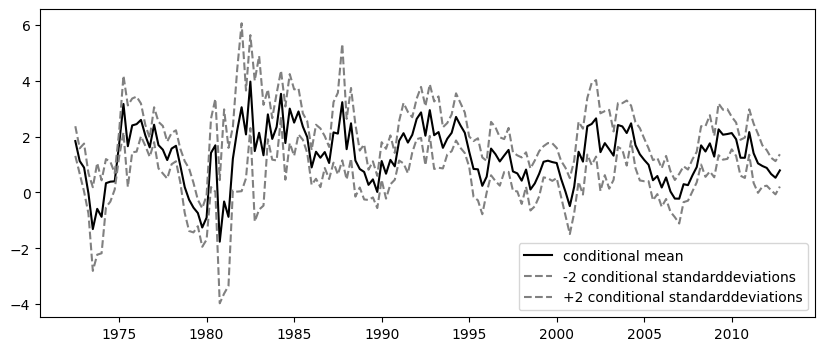

In [ ]:
 # plot the results
forecast_df = pd.DataFrame(forecasts,index=date_index,columns=['conditional mean', 'lower bound', 'upper bound'])
plt.figure(figsize=(10,4))
plt.plot(forecast_df['conditional mean'], label='conditional mean',color='black')
plt.plot(forecast_df['lower bound'], label='-2 conditional standarddeviations', color='gray', linestyle='--')
plt.plot(forecast_df['upper bound'], label='+2 conditional standarddeviations', color='gray', linestyle='--')
plt.legend()
plt.show()


# **1. The Model of the Mean**

In [ ]:
dt_parser = lambda x: datetime.datetime.strptime(str(x), "%Y:%m:%d")
data = pd.read_excel("/content/drive/MyDrive/GARCH/TAF_3_Modelling_Volatility_PES_nyse.xlsx",parse_dates=['ENTRY'], date_parser=dt_parser)
data.index = pd.to_datetime(data['ENTRY'])
rate = data['RATE']
print("a mean value")
print(rate.mean())
print("a sample variance")
print(rate.var())

a mean value
0.003025100260996936
a sample variance
1.6374888484409134


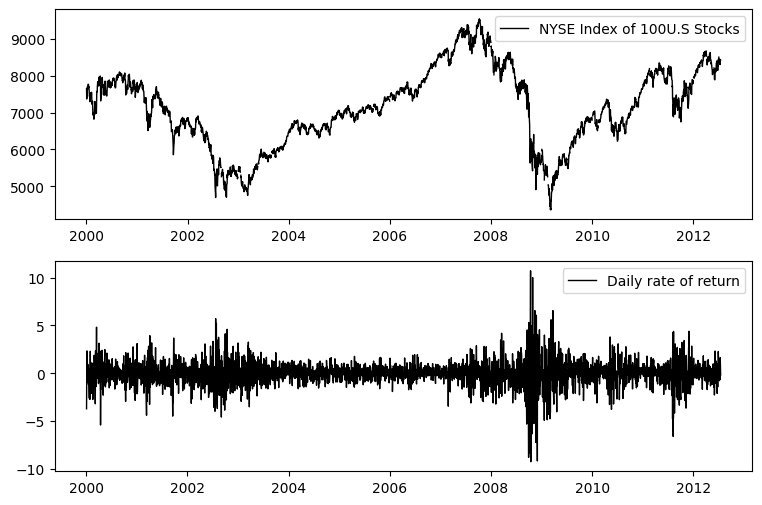

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 2*3))
axes[0].plot(data['RETURN'],color='black',linewidth=1,label='NYSE Index of 100U.S Stocks')
axes[0].legend()
axes[1].plot(rate,color='black',linewidth=1,label='Daily rate of return')
axes[1].legend()


In [ ]:
robjects.r('data = read_excel(\"/content/drive/MyDrive/GARCH/TAF_3_Modelling_Volatility_PES_nyse.xlsx\")')
robjects.r('return = as.numeric(as.character(data$RETURN))')
robjects.r('rate = na.omit(data$RATE)')
x = robjects.r("x=seq(-10,10,0.01)")
y1 = robjects.r('y1=dnorm(x)')
y2 = robjects.r('y2=dt(x,df=3)')


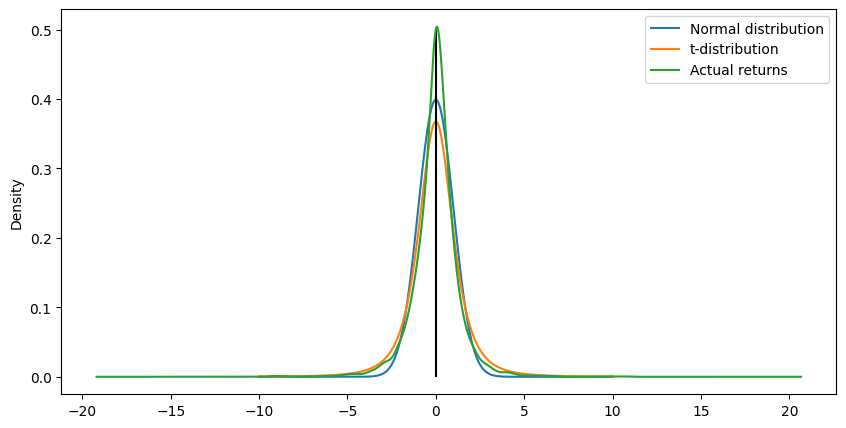

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x,y1, label='Normal distribution')
plt.plot(x,y2, label='t-distribution')
plt.vlines(x=0, ymin=0.5, ymax=0, color='black')
rate.plot(kind='density', label='Actual returns')
plt.legend()

In [ ]:
 acf_nyse_rate = acf(rate.dropna(), nlags=8)[1:]
print(acf_nyse_rate)
print(len(rate.dropna()))


[-0.08939543 -0.04898622  0.01803946 -0.00350624 -0.04102434 -0.01286489
 -0.03719031  0.0496124 ]
3270


In [ ]:
 robjects.r('spec.ar2 = arfimaspec(mean.model=list(armaOrder=c(2,0)))')
fit_ar2 = robjects.r('fit.ar2 = arfimafit(spec.ar2,data=rate)')
print(fit_ar2)
robjects.r('spec.ma1 = arfimaspec(mean.model=list(armaOrder=c(0,1)))')
fit_ma1 = robjects.r('fit.ma1 = arfimafit(spec.ma1,data=rate)')
print(fit_ma1)


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(2,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu     0.003221    0.019313   0.1668 0.867524
ar1   -0.094621    0.017481  -5.4127 0.000000
ar2   -0.057468    0.017463  -3.2908 0.000999
sigma  1.272226    0.015732  80.8702 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu     0.003221    0.018441  0.17469 0.861323
ar1   -0.094621    0.025098 -3.77007 0.000163
ar2   -0.057468    0.037973 -1.51338 0.130184
sigma  1.272226    0.083960 15.15285 0.000000

LogLikelihood : -5427.239 

Information Criteria
------------------------------------
                   
Akaike       3.3219
Bayes        3.3293
Shibata      3.3219
Hannan-Quinn 3.3245

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
                       

# **2. Testing for GARCH errors**

In [ ]:
robjects.r('res.ar2 = fit.ar2@fit$residuals')
robjects.r('spec.ar5 = arfimaspec(mean.model=list(armaOrder=c(5,0)))')
fit_ar5 = robjects.r('fit.ar5 = arfimafit(spec.ar5,data=res.ar2^2)')
print(fit_ar5)


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(5,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu     1.654270    0.254565  6.49841 0.000000
ar1    0.047594    0.017030  2.79464 0.005196
ar2    0.308949    0.016952 18.22531 0.000000
ar3    0.003986    0.017791  0.22406 0.822710
ar4    0.104284    0.016950  6.15254 0.000000
ar5    0.232935    0.017010 13.69439 0.000000
sigma  4.431785    0.054816 80.84911 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu     1.654270    0.258447 6.400808 0.000000
ar1    0.047594    0.057168 0.832526 0.405112
ar2    0.308949    0.107653 2.869867 0.004106
ar3    0.003986    0.052021 0.076626 0.938921
ar4    0.104284    0.037234 2.800774 0.005098
ar5    0.232935    0.048274 4.825249 0.000001
sigma  4.431785    0.762438 5.812649 0.000000

LogLikelihood : -9507

# **3. Alternative Estimates of the Model**

In [ ]:
robjects.r('spec.ar2garch11.norm = ugarchspec(mean.model=list(armaOrder=c(2,0)),variance.model=list(garchOrder=c(1,1),model="sGARCH"),distribution.model="norm")')
robjects.r('fit.ar2garch11.norm = ugarchfit(spec.ar2garch11.norm,data=rate)')
fit_ar2_garch11_norm_dist = robjects.r('fit.ar2garch11.norm')
print(fit_ar2_garch11_norm_dist)



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(2,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.039507    0.013479   2.9311 0.003378
ar1    -0.057619    0.018846  -3.0573 0.002233
ar2    -0.038217    0.018513  -2.0644 0.038981
omega   0.013742    0.002763   4.9735 0.000001
alpha1  0.083999    0.008087  10.3864 0.000000
beta1   0.906308    0.008477 106.9118 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.039507    0.012996   3.0398 0.002367
ar1    -0.057619    0.017315  -3.3277 0.000876
ar2    -0.038217    0.019510  -1.9589 0.050124
omega   0.013742    0.004365   3.1484 0.001642
alpha1  0.083999    0.012065   6.9621 0.000000
beta1   0.906308    0.011488  78.8898 0.000000

LogLike

In [ ]:
robjects.r('spec.ar2garch11.t = ugarchspec(mean.model=list(armaOrder=c(2,0)),variance.model=list(garchOrder=c(1,1),model="sGARCH"),distribution.model="std")')
robjects.r('fit.ar2garch11.t = ugarchfit(spec.ar2garch11.t,data=rate)')
fit_ar2_garch11_t_dist = robjects.r('fit.ar2garch11.t')
print(fit_ar2_garch11_t_dist)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(2,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.054964    0.012362   4.4463 0.000009
ar1    -0.062179    0.017302  -3.5937 0.000326
ar2    -0.045499    0.017719  -2.5678 0.010235
omega   0.009252    0.002969   3.1166 0.001830
alpha1  0.088743    0.010405   8.5290 0.000000
beta1   0.909353    0.009665  94.0863 0.000000
shape   6.120997    0.699129   8.7552 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.054964    0.011824   4.6483 0.000003
ar1    -0.062179    0.014776  -4.2081 0.000026
ar2    -0.045499    0.018302  -2.4860 0.012919
omega   0.009252    0.002788   3.3188 0.000904
alpha1  0.088743    0.011573   7.6684 0.000000
beta1   0

In [ ]:
 robjects.r('spec.ma2igarch11.t = ugarchspec(mean.model=list(armaOrder=c(0,2)),variance.model=list(garchOrder=c(1,1),model="iGARCH"), distribution.model="std")')
robjects.r('fit.ma2igarch11.t = ugarchfit(spec.ma2igarch11.t,data=rate)')
fit_ma2_igarch11_t_dist = robjects.r('fit.ma2igarch11.t')
print(fit_ma2_igarch11_t_dist)



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,2)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.055235    0.012198   4.5282 0.000006
ma1    -0.063119    0.017243  -3.6606 0.000252
ma2    -0.044445    0.018045  -2.4631 0.013775
omega   0.008640    0.002428   3.5589 0.000372
alpha1  0.090456    0.009548   9.4738 0.000000
beta1   0.909544          NA       NA       NA
shape   6.002517    0.607556   9.8798 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.055235    0.012257   4.5064 0.000007
ma1    -0.063119    0.015628  -4.0389 0.000054
ma2    -0.044445    0.018897  -2.3520 0.018674
omega   0.008640    0.002497   3.4607 0.000539
alpha1  0.090456    0.009518   9.5033 0.000000
beta1   0

In [ ]:
# archpow Indicates whether to use st.deviation (1) or variance (2) in the ARCHin mean regression.
robjects.r('spec.ma2igarchm11.norm = ugarchspec(mean.model=list(armaOrder=c(0,2),archm=TRUE,archpow=2),variance.model=list(garchOrder=c(1,1),model="iGARCH"),distribution.model="std")')
fit_ma2_igarchm11 = robjects.r('fit.ma2igarchm11.norm = ugarchfit(spec.ma2igarchm11.norm,data=rate)')
print(fit_ma2_igarchm11)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,2)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.045219    0.016115  2.80602 0.005016
ma1    -0.063432    0.017250 -3.67714 0.000236
ma2    -0.044371    0.018038 -2.45987 0.013899
archm   0.013531    0.014157  0.95579 0.339180
omega   0.008759    0.002452  3.57170 0.000355
alpha1  0.091082    0.009600  9.48811 0.000000
beta1   0.908918          NA       NA       NA
shape   6.005112    0.608693  9.86558 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.045219    0.016230  2.78609 0.005335
ma1    -0.063432    0.015636 -4.05671 0.000050
ma2    -0.044371    0.018833 -2.35597 0.018475
archm   0.013531    0.014397  0.93986 0.347291
omega   0

# **4. Diagnostic Checking**

In [ ]:
robjects.r('sres.ma2igarch11.t = fit.ma2igarch11.t@fit$z')
squared_resids_ma2_igarch11 = robjects.r('sres.ma2igarch11.t')
LJ5 = robjects.r('Box.test(sres.ma2igarch11.t,lag=5,type="Ljung-Box")')
LJ10 = robjects.r('Box.test(sres.ma2igarch11.t,lag=10,type="Ljung-Box")')
LJ15 = robjects.r('Box.test(sres.ma2igarch11.t,lag=15,type="Ljung-Box")')
acf1 = robjects.r('acf1 = acf(sres.ma2igarch11.t^2)')
print(LJ5)
print(LJ10)
print(LJ15)
print(acf1)



	Box-Ljung test

data:  sres.ma2igarch11.t
X-squared = 3.623, df = 5, p-value = 0.6049



	Box-Ljung test

data:  sres.ma2igarch11.t
X-squared = 8.4666, df = 10, p-value = 0.5834



	Box-Ljung test

data:  sres.ma2igarch11.t
X-squared = 15.164, df = 15, p-value = 0.4397



Autocorrelations of series ‘sres.ma2igarch11.t^2’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.047  0.033 -0.010  0.016 -0.008 -0.015  0.027 -0.010  0.015  0.043 
    11     12     13     14     15     16     17     18     19     20     21 
-0.013  0.020  0.007  0.003 -0.010 -0.001 -0.011 -0.007 -0.010  0.005 -0.007 
    22     23     24     25     26     27     28     29     30     31     32 
-0.014  0.009 -0.008 -0.014 -0.022 -0.020 -0.012 -0.022 -0.016 -0.009 -0.007 
    33     34     35 
-0.012 -0.007 -0.010 



In [ ]:
robjects.r('spec.ar2 = arfimaspec(mean.model=list(armaOrder=c(2,0)))')
fit_ar2 = robjects.r('fit.ar2 = arfimafit(spec.ar2,data=sres.ma2igarch11.t^2)')
print(fit_ar2)



*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(2,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu     0.980078    0.033570  29.1954 0.000000
ar1   -0.045192    0.017520  -2.5794 0.009897
ar2    0.030695    0.017481   1.7559 0.079101
sigma  1.947448    0.024077  80.8858 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu     0.980078    0.034638 28.29473 0.000000
ar1   -0.045192    0.010547 -4.28482 0.000018
ar2    0.030695    0.032276  0.95101 0.341598
sigma  1.947448    0.237759  8.19083 0.000000

LogLikelihood : -6819.868 

Information Criteria
------------------------------------
                   
Akaike       4.1736
Bayes        4.1811
Shibata      4.1736
Hannan-Quinn 4.1763

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
                       

In [ ]:
# Leverage effects
"""
Embed function example
robjects.r('x<-1:10')
robjects.r('embed(x,3)')
array([[ 3, 2, 1],
[ 4, 3, 2],
[ 5, 4, 3],
[ 6, 5, 4],
[ 7, 6, 5],
[ 8, 7, 6],
[ 9, 8, 7],
[10, 9, 8]], dtype=int32)
"""
robjects.r('plag = 2')
st = robjects.r('st = embed(sres.ma2igarch11.t,plag+1)')
fit_lv_effects = robjects.r('summary(lm(st[,1]^2~st[,-1]))')
print(fit_lv_effects)



Call:
lm(formula = st[, 1]^2 ~ st[, -1])

Residuals:
   Min     1Q Median     3Q    Max 
-2.148 -0.865 -0.604  0.160 53.641 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.96065    0.03402  28.236  < 2e-16 ***
st[, -1]1   -0.09503    0.03434  -2.767  0.00568 ** 
st[, -1]2   -0.17755    0.03431  -5.175 2.42e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.937 on 3265 degrees of freedom
Multiple R-squared:  0.01047,	Adjusted R-squared:  0.009859 
F-statistic: 17.27 on 2 and 3265 DF,  p-value: 3.475e-08




In [ ]:
d = robjects.r('d = ifelse(sres.ma2igarch11.t<0,1,0)')
robjects.r('plag = 3')
d3 = robjects.r('d3 = embed(d,plag+1)[,-1]') # Exclude the first column
en_sign_test = robjects.r('summary(lm(sres.ma2igarch11.t[-c(1:plag)]^2~d3))')
print(en_sign_test)


Call:
lm(formula = sres.ma2igarch11.t[-c(1:plag)]^2 ~ d3)

Residuals:
   Min     1Q Median     3Q    Max 
-1.324 -0.883 -0.585  0.162 53.436 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.61452    0.06941   8.854  < 2e-16 ***
d31          0.28851    0.06778   4.257 2.13e-05 ***
d32          0.28360    0.06778   4.184 2.94e-05 ***
d33          0.13755    0.06778   2.029   0.0425 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.936 on 3263 degrees of freedom
Multiple R-squared:  0.01187,	Adjusted R-squared:  0.01096 
F-statistic: 13.07 on 3 and 3263 DF,  p-value: 1.756e-08




# **5. The Asymmetric Models**

In [ ]:
# The Asymmetric Models
robjects.r('spec.ar2tgarch11 = ugarchspec(mean.model=list(armaOrder=c(2,0)),variance.model=list(garchOrder=c(1,1),model="gjrGARCH"),distribution.model="std")')
fit_ar2_tgarch_11 = robjects.r('fit.ar2tgarch11 = ugarchfit(spec.ar2tgarch11,data=rate,solver="gosolnp")')
# assymetry term1 (rotation): 'gamma1'
print(fit_ar2_tgarch_11)



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(2,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.033221    0.012547   2.6477 0.008104
ar1    -0.061370    0.017230  -3.5618 0.000368
ar2    -0.041372    0.017533  -2.3597 0.018290
omega   0.010003    0.002449   4.0839 0.000044
alpha1  0.000000    0.011964   0.0000 1.000000
beta1   0.921156    0.011200  82.2458 0.000000
gamma1  0.137391    0.016985   8.0889 0.000000
shape   7.084653    0.907642   7.8056 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.033221    0.012149   2.7346 0.006246
ar1    -0.061370    0.014628  -4.1953 0.000027
ar2    -0.041372    0.018007  -2.2976 0.021586
omega   0.010003    0.002615   3.8254 0.000131
alpha1 

In [ ]:
# The Asymmetric Models
robjects.r('spec.ar2egarch11 = ugarchspec(mean.model=list(armaOrder=c(2,0)),variance.model=list(garchOrder=c(1,1),model="eGARCH"), distribution.model="std")')
fit_ar2_egarch_11 = robjects.r('fit.ar2egarch11 = ugarchfit(spec.ar2egarch11,data=rate,solver="gosolnp")')
# assymetry term1 (rotation): 'gamma1'
print(fit_ar2_egarch_11)



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(2,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.035161    0.011312   3.1084 0.001881
ar1    -0.060304    0.016754  -3.5993 0.000319
ar2    -0.031844    0.017459  -1.8239 0.068167
omega  -0.004720    0.002535  -1.8621 0.062584
alpha1 -0.129199    0.011542 -11.1936 0.000000
beta1   0.986078    0.001074 917.8331 0.000000
gamma1  0.108048    0.014222   7.5973 0.000000
shape   6.856250    0.834976   8.2113 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.035161    0.011058    3.1798 0.001474
ar1    -0.060304    0.014051   -4.2917 0.000018
ar2    -0.031844    0.018293   -1.7408 0.081725
omega  -0.004720    0.002720   -1.7349 0.082760
alph

In [ ]:
# Checks of the standardized residuals
std_resid_ar2egarch11 = robjects.r('res.ar2egarch11 = fit.ar2egarch11@fit$z')
robjects.r('spec.ar1 = arfimaspec(mean.model=list(armaOrder=c(1,0)))')
fit_ar1=robjects.r('fit.ar1 = arfimafit(spec.ar1,data=res.ar2egarch11^2)')
print(fit_ar1)


*----------------------------------*
*          ARFIMA Model Fit        *
*----------------------------------*
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
       Estimate  Std. Error  t value Pr(>|t|)
mu     0.996108    0.031547   31.576 0.000000
ar1   -0.054047    0.017463   -3.095 0.001968
sigma  1.901439    0.023512   80.870 0.000000

Robust Standard Errors:
       Estimate  Std. Error  t value Pr(>|t|)
mu     0.996108    0.034618  28.7747    0e+00
ar1   -0.054047    0.011304  -4.7813    2e-06
sigma  1.901439    0.196044   9.6990    0e+00

LogLikelihood : -6741.267 

Information Criteria
------------------------------------
                   
Akaike       4.1249
Bayes        4.1305
Shibata      4.1249
Hannan-Quinn 4.1269

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
                        statistic p-value
Lag[1]                   0.004376  0.9473
Lag[2*(p+q)+(p+q)-1][2]  0.7059

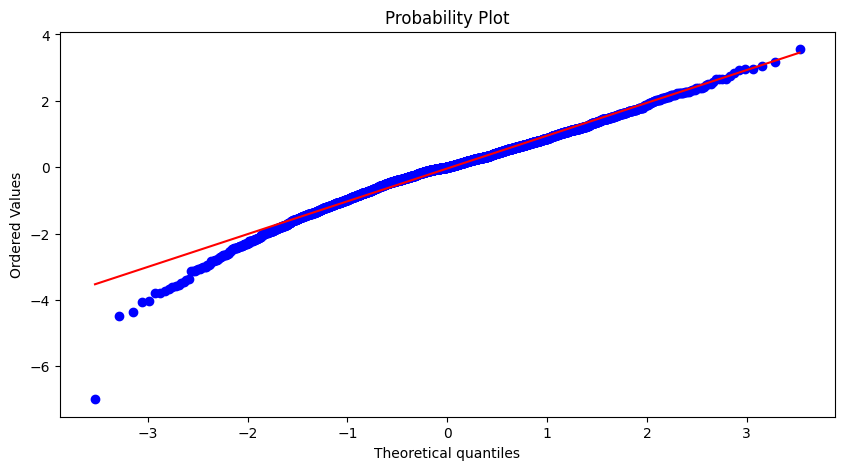

In [ ]:
# Q-plots to determine the distribution of the errors
plt.figure(figsize=(10,5))
stats.probplot(std_resid_ar2egarch11, dist=stats.t(df=3262), plot=plt)
plt.show()

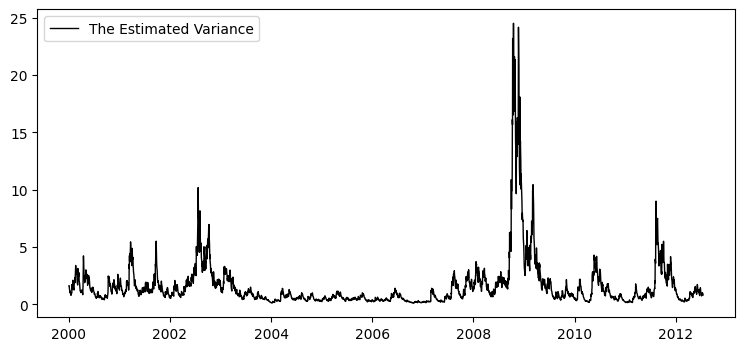

In [ ]:
estimated_var = robjects.r('fit.ar2egarch11@fit$sigma^2')
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
axes.plot(pd.Series(estimated_var,index=data.index[1:]),color='black',linewidth=1,label='The Estimated Variance')
axes.legend()